In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("Mumbai.txt",index_col=0)

In [3]:
df.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [4]:
df.shape

(6347, 18)

In [5]:
df.groupby('Area')['Area'].agg('count')

Area
200     2
216     1
220     3
225     6
239     1
       ..
6381    1
6900    1
7000    1
7600    1
8511    1
Name: Area, Length: 1140, dtype: int64

In [6]:
df.drop(['Landscaped Gardens','Jogging Track','Swimming Pool','Indoor Games','New/Resale','Gas Connection'],axis=1,inplace=True)

In [7]:
df.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom
0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0
2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1
3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1
4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1


In [8]:
df.shape

(6347, 12)

In [9]:
df.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
dtype: int64

In [10]:
df['No. of Bedrooms'].unique()

array([1, 4, 3, 2, 5, 6, 7], dtype=int64)

In [11]:
df['Area'].unique()

array([ 720,  600,  650, ...,  250, 1162,  435], dtype=int64)

In [12]:
df['Price_per_sqft'] = df['Price']/df['Area']

In [13]:
df.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Price_per_sqft
0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0,6736.111111
1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0,7500.000000
2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1,10307.692308
3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1,6923.076923
4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1,7518.796992


In [14]:
df['Location'].unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [15]:
len(df.Location.unique())

413

In [16]:
df["Location"].apply(lambda x:x.strip())

0            Kharghar
1            Kharghar
2            Kharghar
3            Kharghar
4            Kharghar
            ...      
6342         Shirgaon
6343       Thane West
6344       Thane West
6345           Boisar
6346    Badlapur East
Name: Location, Length: 6347, dtype: object

In [17]:
df["Location"]=df["Location"].apply(lambda x:x.strip())

In [18]:
df["Location"].unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [19]:
location_stats = df.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Kharghar                533
Thane West              418
Mira Road East          390
Ulwe                    319
Borivali West           176
                       ... 
Pokhran Road No 2         1
Poonam Sagar Complex      1
Ramdev Park               1
Ranjanpada                1
worli sea face            1
Name: Location, Length: 413, dtype: int64

In [20]:
len(location_stats[location_stats<=5])

284

In [21]:
locations_Under_5 = location_stats[location_stats<=5]
print(locations_Under_5)

Location
Mumbai Highway          5
CBD Belapur East        5
Central Avenue          5
Tardeo                  5
Majiwada thane          5
                       ..
Pokhran Road No 2       1
Poonam Sagar Complex    1
Ramdev Park             1
Ranjanpada              1
worli sea face          1
Name: Location, Length: 284, dtype: int64


In [22]:
df.Location = df.Location.apply(lambda x:'other' if x in locations_Under_5 else x)
len(df.Location.unique())

130

In [23]:
df.rename(
    columns=({ 'No. of Bedrooms': 'bhk','Lift Available':'Lift','Car Parking':'Car','24x7 Security':'Security'}), 
    inplace=True,
)

In [24]:
df.head()

,Price,Area,Location,bhk,Gymnasium,Lift,Car,Maintenance Staff,Security,Children's Play Area,Clubhouse,Intercom,Price_per_sqft
0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0,6736.111111
1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0,7500.000000
2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1,10307.692308
3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1,6923.076923
4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1,7518.796992


In [25]:
df.describe()

,Price,Area,bhk,Gymnasium,Lift,Car,Maintenance Staff,Security,Children's Play Area,Clubhouse,Intercom,Price_per_sqft
count,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,1.515401e+07,1004.327084,1.910036,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,13555.465839
std,2.015943e+07,556.375703,0.863304,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,9573.921483
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1597.444089
25%,5.300000e+06,650.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7234.042553
50%,9.500000e+06,905.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,10493.827160
75%,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17142.857143
max,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,109950.522265


In [26]:
# Checking for outliers

In [27]:
df[df.Area/df.bhk<200]

,Price,Area,Location,bhk,Gymnasium,Lift,Car,Maintenance Staff,Security,Children's Play Area,Clubhouse,Intercom,Price_per_sqft
4573,9370000,583,Mira Road East,3,1,1,1,0,1,1,1,1,16072.041166
6138,9500000,583,Mira Road East,3,1,1,1,0,1,1,1,1,16295.025729


In [28]:
df[df.Area/df.bhk<200].head()

,Price,Area,Location,bhk,Gymnasium,Lift,Car,Maintenance Staff,Security,Children's Play Area,Clubhouse,Intercom,Price_per_sqft
4573,9370000,583,Mira Road East,3,1,1,1,0,1,1,1,1,16072.041166
6138,9500000,583,Mira Road East,3,1,1,1,0,1,1,1,1,16295.025729


In [29]:
df.shape

(6347, 13)

In [30]:
df = df[~(df.Area/df.bhk<200)]
df.shape

(6345, 13)

In [31]:
def removeOutliners(df):
    # Finding the mean and standard deviation based on location
    # Filtering the data which lies in 1st standard deviation to the left and right and dropping others
    # storing it in gen_df and concating that in df_output 
  df_Out = pd.DataFrame()
  for key,subdf in df.groupby('Location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_Out = pd.concat([df_Out,reduced],ignore_index=True)
  return df_Out

In [32]:
df = removeOutliners(df)
df.shape

(4869, 13)

In [33]:
df.Location.unique

<bound method Series.unique of 0                  Airoli
1                  Airoli
2                  Airoli
3                  Airoli
4                  Airoli
              ...        
4864    taloja panchanand
4865      vile parle west
4866      vile parle west
4867      vile parle west
4868      vile parle west
Name: Location, Length: 4869, dtype: object>

In [34]:
df.to_csv("data.csv",index=False)

In [35]:
labels_ordered=df.groupby(["Location"])['Price'].mean().sort_values().index

In [36]:
labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}

In [79]:
# Store data (serialize)
with open('label.pickle', 'wb') as handle:
    pickle.dump(labels_ordered, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load data (deserialize)
with open('label.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)


In [37]:
df["Location"]=df["Location"].map(labels_ordered)

In [38]:
X = df.drop('Price',axis='columns')
y=df["Price"]

In [39]:
def information(x_train,y_train):
    """This function will give the relationship between Target and features.
    """
    from sklearn.feature_selection import mutual_info_regression
    mutual_info=mutual_info_regression(x_train,y_train)
    mutual_info=pd.Series(mutual_info, index=x_train.columns)
    return mutual_info.sort_values(ascending=False)

In [40]:
information(X,y)

Price_per_sqft          1.062024
Location                0.784901
Area                    0.650405
bhk                     0.398628
Gymnasium               0.042212
Maintenance Staff       0.037810
Intercom                0.037662
Children's Play Area    0.029898
Lift                    0.024434
Security                0.021115
Car                     0.011985
Clubhouse               0.008427
dtype: float64

In [41]:
data=df.drop(["Price_per_sqft","Children's Play Area","Security","Lift","Intercom","Gymnasium","Maintenance Staff","Clubhouse"],axis='columns')

<AxesSubplot:>

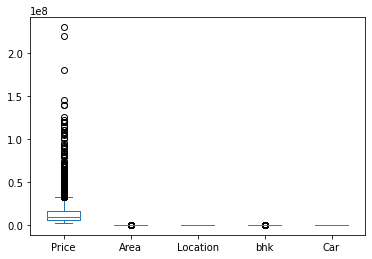

In [135]:
data.plot.box()

In [43]:
# data.to_csv("data.csv",index=False)

In [44]:
X = df.drop(["Price","Price_per_sqft","Children's Play Area","Security","Lift","Intercom","Gymnasium","Maintenance Staff","Clubhouse"],axis='columns')
y=df["Price"]

In [119]:
len(y[y<10000000])

2691

In [134]:
X

,Area,Location,bhk,Car
0,400,50,1,1
1,1000,50,2,1
2,1245,50,2,1
3,1183,50,2,1
4,1245,50,2,1
...,...,...,...,...
4864,1050,26,2,1
4865,1509,119,3,0
4866,1073,119,2,0
4867,1735,119,3,0


In [46]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=100)

In [47]:
scale=StandardScaler()

In [48]:
lin_reg=LinearRegression()

In [49]:
pipe=make_pipeline(scale,lin_reg)

In [50]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [51]:
y_pread_lin=pipe.predict(X_test)

In [52]:
r2_score(y_test,y_pread_lin)

0.7300519356678528

In [53]:
lassoc=LassoCV(alphas=np.linspace(0.001,10,30),cv=20)
lassoc.fit(X_train,y_train)

LassoCV(alphas=array([1.00000000e-03, 3.45793103e-01, 6.90586207e-01, 1.03537931e+00,
       1.38017241e+00, 1.72496552e+00, 2.06975862e+00, 2.41455172e+00,
       2.75934483e+00, 3.10413793e+00, 3.44893103e+00, 3.79372414e+00,
       4.13851724e+00, 4.48331034e+00, 4.82810345e+00, 5.17289655e+00,
       5.51768966e+00, 5.86248276e+00, 6.20727586e+00, 6.55206897e+00,
       6.89686207e+00, 7.24165517e+00, 7.58644828e+00, 7.93124138e+00,
       8.27603448e+00, 8.62082759e+00, 8.96562069e+00, 9.31041379e+00,
       9.65520690e+00, 1.00000000e+01]),
        cv=20)

In [54]:
lassoc.alpha_

0.001

In [55]:
lasso=Lasso(alpha=lassoc.alpha_)

In [56]:
pipe2=make_pipeline(scale,lasso)

In [57]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.001))])

In [58]:
y_pread_lasso=pipe2.predict(X_test)

In [59]:
r2_score(y_test,y_pread_lasso)

0.7300519356725843

In [60]:
rf=RandomForestRegressor(n_estimators=120)

In [61]:
pipe4=make_pipeline(scale,rf)

pipe4.fit(X_train,y_train)

y_pread_rf=pipe4.predict(X_test)

r2_score(y_test,y_pread_rf)

0.9233382922783893

In [132]:
# pipe4.predict(400,50,1,1)

In [61]:
def pikle_save(name,model):
    import pickle
    pickle.dump(model, open(f'{name}.pickle', 'wb'))

In [62]:
name="Random_forest"
pikle_save(name,rf)

In [65]:
gbr=GradientBoostingRegressor(learning_rate=0.2)

In [66]:
pipe5=make_pipeline(scale,gbr)

pipe5.fit(X_train,y_train)

y_pread_gbr=pipe5.predict(X_test)

r2_score(y_test,y_pread_gbr)

0.9220625273359032

In [92]:
unserialized_data

{'Badlapur': 0,
 'Badlapur West': 1,
 'Karjat': 2,
 'Virar East': 3,
 'Nalasopara West': 4,
 'Titwala': 5,
 'Nala Sopara': 6,
 'Ambernath West': 7,
 'Naigaon East': 8,
 'Boisar': 9,
 'Palghar': 10,
 'Badlapur East': 11,
 'Ambernath East': 12,
 'Virar West': 13,
 'Kewale': 14,
 'Virar': 15,
 'Koproli': 16,
 'Vasai east': 17,
 'Taloja': 18,
 'Dronagiri': 19,
 'Nalasopara East': 20,
 'Karanjade': 21,
 'Dombivali East': 22,
 'Vasai': 23,
 'Sector 22 Kamothe': 24,
 'Thane': 25,
 'taloja panchanand': 26,
 'mumbai': 27,
 'Vasai West': 28,
 'Dombivli (West)': 29,
 'Bhayandar East': 30,
 'Mira Road and Beyond': 31,
 'Kalyan West': 32,
 'Shil Phata': 33,
 'Kalyan East': 34,
 'Dombivali': 35,
 'Navi Basti': 36,
 'Bhiwandi': 37,
 'PARSIK NAGAR': 38,
 'Palava': 39,
 'Sector 17 Ulwe': 40,
 'Kalwa': 41,
 'Ulwe': 42,
 'Kamothe': 43,
 'Mira Road East': 44,
 'Panvel': 45,
 'Majiwada': 46,
 'Sector12 Kamothe': 47,
 'Sector 21 Kamothe': 48,
 'Sector 19 Kharghar': 49,
 'Airoli': 50,
 'Sector 20 Kharghar': 

In [63]:
pipe = pickle.load(open("Random_forest.pickle", 'rb'))

In [131]:
location ="kavesar"
location=unserialized_data[location]
area =200
bhk =2
car ="Yes"
car=car.lower()
dt={"yes":1,"no":0}
car=dt[car]
user_input=pd.DataFrame([[location,area,bhk,car]], columns=["Location","Area","bhk","Car"])
prediction=pipe.predict(user_input)[0]
prediction

203675000.0

yes
1
